--------------------------------------
# **ML Feature Selection & Dimension Reduction**

--------------------------------------

# **1. Feature Selection**

## 1.1. Feature Selection with Boruta

### 0. Setup

In [1]:
# Install missing package in the notebook environment
#%pip install boruta

from sklearn.datasets import load_breast_cancer

from sklearn import preprocessing
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy


Note: you may need to restart the kernel to use updated packages.


### 1. Data Loading and Exploration

In [2]:
# load the data trainging set
X, y = load_breast_cancer(return_X_y=True, as_frame = True)
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)


RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [5]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X.values, y.values) # use .values to convert DataFrame to numpy array

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X.values) # result is a numpy array

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
I

In [6]:
# number of selected features
print ('Number of selected features out of 30:')
print (feat_selector.n_features_)

Number of selected features out of 30:
25


In [7]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(data.feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: mean radius               Rank: 1,  Keep: True
Feature: mean texture              Rank: 1,  Keep: True
Feature: mean perimeter            Rank: 1,  Keep: True
Feature: mean area                 Rank: 1,  Keep: True
Feature: mean smoothness           Rank: 1,  Keep: True
Feature: mean compactness          Rank: 1,  Keep: True
Feature: mean concavity            Rank: 1,  Keep: True
Feature: mean concave points       Rank: 1,  Keep: True
Feature: mean symmetry             Rank: 1,  Keep: True
Feature: mean fractal dimension    Rank: 2,  Keep: False
Feature: radius error              Rank: 1,  Keep: True
Feature: texture error             Rank: 3,  Keep: False
Feature: perimeter error           Rank: 1,  Keep: True
Feature: area error                Rank: 1,  Keep: True
Feature: smoothness error          Rank: 3,  Keep: False
Feature: compactness error         Rank: 1,  Keep: True
Feature: concavity error           Rank: 1,  Keep: True
Feature: concave points error      Rank: 1,  

### Summary: Feature Selection with Boruta

In this section, we used the **Boruta algorithm** to identify the most relevant features from the breast cancer dataset:

- **Started with 30 features** from the breast cancer dataset
- Boruta compared each feature against randomized "shadow features" to determine importance
- **Selected features** are those that consistently performed better than random noise
- The algorithm assigned a **ranking** to each feature (1 = most important)
- Features with `Keep: True` are considered relevant for the classification task

**Key Insight**: Boruta helps us reduce dimensionality by removing irrelevant or redundant features while keeping those that truly contribute to predicting breast cancer, potentially improving model performance and interpretability.

## 1.2. Feature Selection with BorutaShap

- pip install BorutaShap*, boruta, shap lime
- *https://stackoverflow.com/questions/78090426/cannot-import-name-binom-test-from-scipy-stats-error-when-using-borutashap


In [38]:
# !pip install git+https://github.com/cbonet/Boruta-Shap.git@fix-bug-130
# !pip install scipy

In [9]:
from BorutaShap import BorutaShap, load_data
  
X, y = load_data(data_type='regression')
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Default model is Random Forest, if classification is True it is a Classification problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

4 attributes confirmed important: ['bmi', 'bp', 's5', 's3']
5 attributes confirmed unimportant: ['sex', 's2', 's1', 'age', 's4']
1 tentative attributes remains: ['s6']


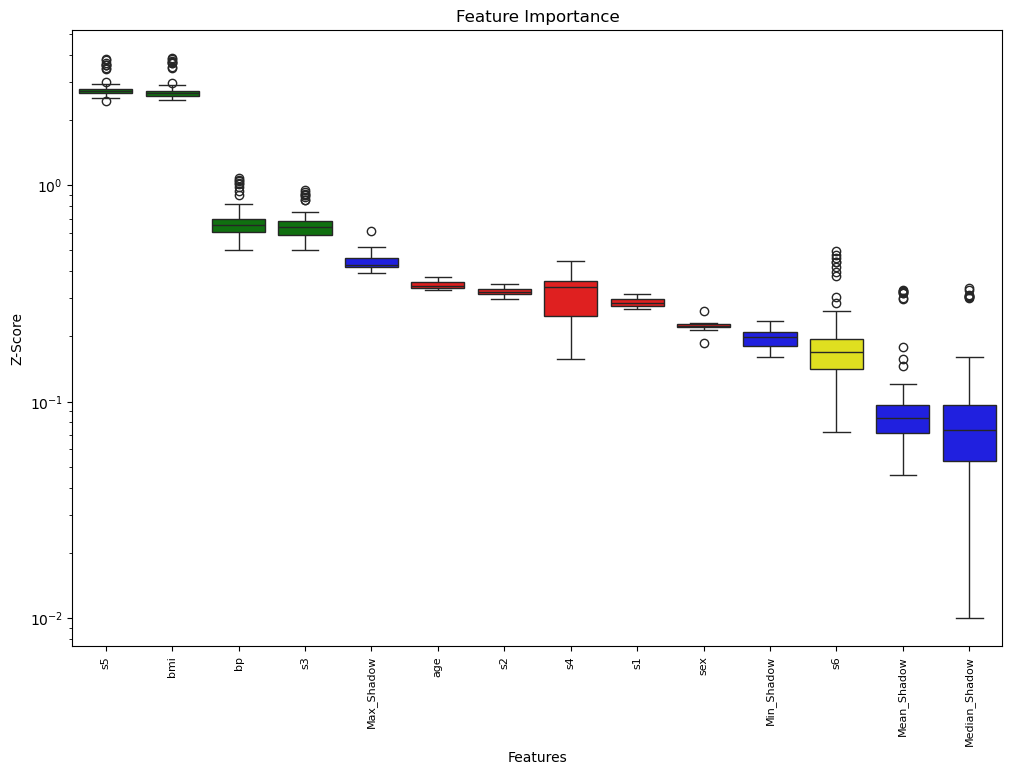

In [11]:
# Returns Boxplot of features
Feature_Selector.plot(which_features='all', 
                      X_size=8, figsize=(12,8),
                      y_scale='log')

In [12]:
# Returns a subset of the original data with the selected features
subset = Feature_Selector.Subset()
subset.head()

,bmi,bp,s5,s3
0,0.061696,0.021872,0.019907,-0.043401
1,-0.051474,-0.026328,-0.068332,0.074412
2,0.044451,-0.005670,0.002861,-0.032356
3,-0.011595,-0.036656,0.022688,-0.036038
4,-0.036385,0.021872,-0.031988,0.008142


### Summary: Feature Selection with BorutaShap

In this section, we used **BorutaShap**, an enhanced version of Boruta that uses SHAP values for feature importance:

- **SHAP (SHapley Additive exPlanations)** provides more interpretable feature importance scores based on game theory
- Applied to a regression problem to identify the most predictive features
- The **boxplot visualization** shows the distribution of SHAP importance values for each feature
- Features are categorized as accepted, tentative, or rejected based on their importance
- The `Subset()` method returns only the selected features for downstream modeling

**Key Advantage**: BorutaShap combines the robustness of Boruta with the interpretability of SHAP values, making it easier to understand *why* certain features are important, not just *which* features are important.

# **2. Dimension Reduction**

## 2.1. PCA: Implementing PCA Using NumPy and SciPy scratch

### 0. Setup

In [13]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
from scipy.linalg import eigh
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


### 1. Data Loading and Exploration

In [14]:
# Load Wine dataset (real-world dataset)
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [15]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [16]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
# Step 1: Standardize the Data
wine_standardized = StandardScaler().fit_transform(wine_df)

In [18]:
wine_standardized

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [19]:
# Step 2: Compute the Covariance Matrix
cov_matrix = np.cov(wine_standardized.T)

In [20]:
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [21]:
# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = eigh(cov_matrix)  # eigh is used for symmetric matrices

In [22]:
# Step 4: Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [23]:
# Step 5: Select Top k Principal Components (Here, k=2)
k = 2
top_eigenvectors = eigenvectors[:, :k]

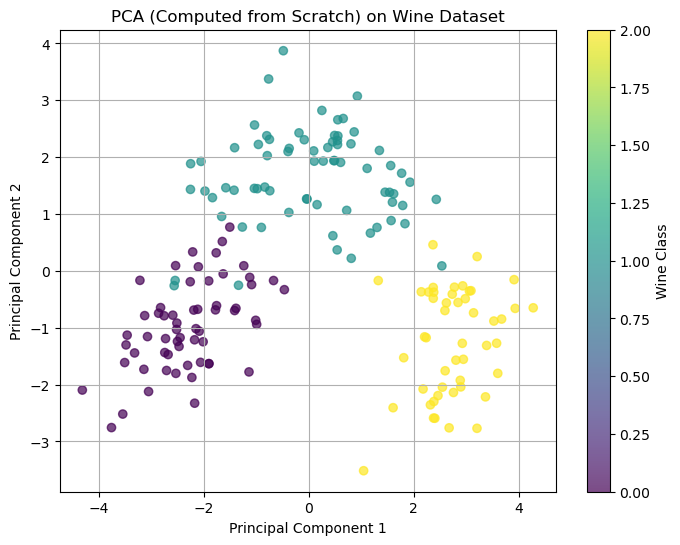

In [24]:
# Step 6: Transform Data to New Feature Space
wine_pca_manual = np.dot(wine_standardized, top_eigenvectors)

# Visualize the PCA Result
plt.figure(figsize=(8, 6))
plt.scatter(wine_pca_manual[:, 0], wine_pca_manual[:, 1], c=wine.target, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (Computed from Scratch) on Wine Dataset")
plt.colorbar(label="Wine Class")
plt.grid()
plt.show()

#### Here is the manual implementation of PCA from scratch using NumPy and SciPy on the Wine Dataset:

**Steps followed:**
- Standardize the data to ensure all features contribute equally.
- Compute the covariance matrix to capture relationships between features.
- Compute eigenvalues and eigenvectors of the covariance matrix.
- Sort eigenvalues and eigenvectors in descending order of importance.
- Select the top kkk eigenvectors (here, k=2k = 2k=2) as the new basis.
- Transform the dataset into this new feature space.

**Visualization:**
- The scatter plot represents the Wine dataset projected onto two principal components.
- Similar to the scikit-learn PCA, we can see clusters forming based on different wine classes.

### Summary: PCA from Scratch

In this section, we implemented **Principal Component Analysis (PCA)** manually using NumPy and SciPy:

**Steps performed:**
1. **Standardized the data** - Ensured all features contribute equally regardless of their original scales
2. **Computed the covariance matrix** - Captured relationships and variance between features
3. **Calculated eigenvalues and eigenvectors** - Found the directions of maximum variance
4. **Sorted by importance** - Ordered components by the amount of variance they explain
5. **Selected top k components** - Chose the 2 most important dimensions for visualization
6. **Transformed the data** - Projected the original 13-dimensional data into 2D space

**Result**: The scatter plot shows that even with just 2 principal components, we can see clear clustering patterns that distinguish between different wine classes. This demonstrates PCA's power in reducing dimensionality while preserving meaningful patterns in the data.

## 2.2. PCA: using SKlearn

### 0. Setup

In [25]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



### 1. Data Loading and Exploration

In [26]:
# Load Wine dataset (real-world dataset)
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [28]:
# Standardize data
wine_scaled = StandardScaler().fit_transform(wine_df)

In [29]:
# Apply PCA
pca_wine = PCA(n_components=2)
wine_pca = pca_wine.fit_transform(wine_scaled)

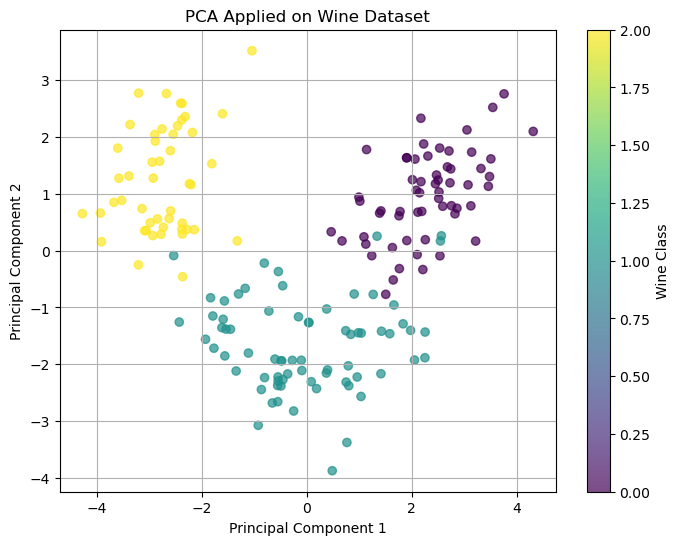

In [30]:
# Create scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine.target, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Applied on Wine Dataset")
plt.colorbar(label="Wine Class")
plt.grid()
plt.show()

### Summary: PCA using scikit-learn

In this section, we applied **PCA using scikit-learn's built-in implementation**:

**What we did:**
- Used the same Wine dataset (13 features → 2 principal components)
- Standardized the data before applying PCA
- Applied `PCA(n_components=2)` from scikit-learn
- Visualized the 2D projection with wine class labels

**Key Observations:**
- The scikit-learn implementation produces the same result as our manual implementation, but with much simpler code
- The scatter plot clearly separates the three wine classes in 2D space
- This demonstrates that PCA can effectively compress 13 dimensions into 2 while preserving class separability

**Practical Advantage**: Using scikit-learn's PCA is faster, more efficient, and includes additional features like inverse transformations and explained variance calculations built-in.

### **Choosing the Right Number** of Principal Components in PCA
- When applying Principal Component Analysis (PCA), a key question is: **“How many principal components should we keep** to retain the most important information while reducing dimensionality?”

This is where the **Explained Variance Ratio**, **Elbow Method**, and **Scree Plot** come into play.

- Understanding the **Explained Variance Ratio**: Each principal component (PC) captures a certain amount of variance in the dataset. The explained variance ratio tells us how much of the total variance is captured by each PC. **A higher explained variance means that the principal component carries more important information**. By summing up the explained variance ratios, we get the cumulative variance, which helps determine how many components are required to capture most of the dataset’s variability.
- A **Scree Plot** is a graphical representation that helps visualize *how much variance each principal component captures*.



## 2.3. Cumulative Variance Plot and Scree plot

### 0. Setup

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

### 1. Data Loading and Exploration

In [32]:
# Load Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [33]:
# Standardize data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

In [34]:
# Apply PCA with all components
pca = PCA(n_components=len(wine.feature_names))
pca.fit(wine_scaled)

PCA(n_components=13)

In [35]:
# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


In [36]:

# Find the optimal number of components (Elbow Method)
optimal_k = np.argmax(cumulative_variance >= 0.95) + 1  # First index where 95% variance is explained

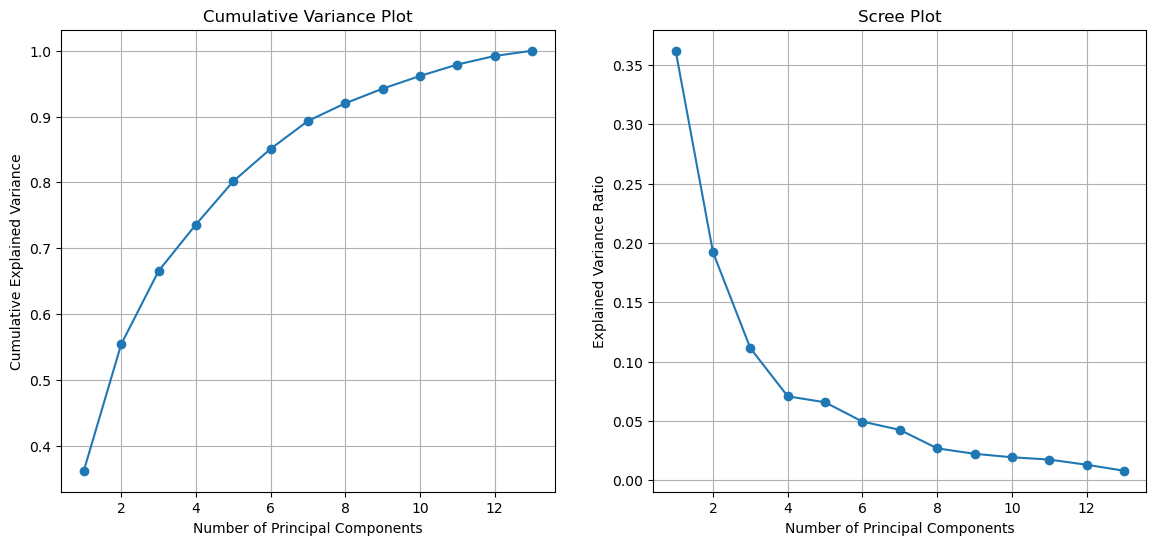

Optimal number of components: 10


In [37]:
# Create a figure with two subplots for Cumulative Variance Plot and Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cumulative Variance Plot
axes[0].plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-')
axes[0].set_xlabel("Number of Principal Components")
axes[0].set_ylabel("Cumulative Explained Variance")
axes[0].set_title("Cumulative Variance Plot")
axes[0].grid()

# Scree Plot (Explained Variance for Each Principal Component)
axes[1].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', label="Explained Variance per Component")
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Explained Variance Ratio")
axes[1].set_title("Scree Plot")
axes[1].grid()

# Show the combined plots
plt.show()

# Print the optimal number of components
print(f"Optimal number of components: {optimal_k}")

- **Cumulative Variance Plot (Left)**: Shows the cumulative sum of explained variance as the number of principal components increases. Helps determine how many components are needed to capture a certain percentage of variance (e.g., 95%). The curve levels off, indicating that adding more components does not significantly increase variance explained.
- **Scree Plot (Right)**: Shows the explained variance ratio for each principal component. The steep drop at the beginning shows that the first few components capture the most variance. The elbow point helps decide the optimal number of components to retain. After the elbow, additional components contribute less useful information.

### Summary: Cumulative Variance and Scree Plots

In this section, we explored **how to choose the optimal number of principal components**:

**What we analyzed:**
1. **Cumulative Variance Plot** - Shows how much total variance is explained as we add more components
2. **Scree Plot** - Shows the variance explained by each individual component
3. **Elbow Method** - Identified the optimal number of components where adding more provides diminishing returns

**Key Findings:**
- The first few principal components capture most of the variance in the dataset
- The cumulative variance plot levels off, indicating that additional components add little value
- We determined the optimal number of components needed to capture 95% of the variance
- The "elbow" in the scree plot shows where additional components become less informative

**Practical Application**: These plots help us make informed decisions about dimensionality reduction:
- Too few components → lose important information
- Too many components → retain noise and increase computational cost
- The sweet spot is where we capture most variance with minimal components (typically where cumulative variance reaches 90-95%)

---

# **3. Overall Summary & Conclusion**

In this notebook, we explored two fundamental techniques for reducing the complexity of high-dimensional datasets: **Feature Selection** and **Dimension Reduction**.

## **Key Takeaways:**

### **1. Feature Selection (Boruta & BorutaShap)**
- **Purpose**: Identify and keep only the most relevant features while removing irrelevant or redundant ones
- **Approach**: Compares real features against randomized shadow features
- **Advantage**: Maintains interpretability - selected features are original, meaningful variables
- **Best for**: When you need to explain *which* specific features drive predictions (e.g., medical diagnosis, business decisions)

### **2. Dimension Reduction (PCA)**
- **Purpose**: Transform high-dimensional data into a lower-dimensional space while preserving variance
- **Approach**: Creates new synthetic features (principal components) that are linear combinations of original features
- **Advantage**: Maximizes information retention while drastically reducing dimensions
- **Best for**: Visualization, noise reduction, and when interpretability of individual features is less critical

## **When to Use What?**

| Scenario | Recommended Technique | Reason |
|----------|----------------------|---------|
| Need interpretable features | **Feature Selection** | Keeps original features intact |
| High multicollinearity | **PCA** | Removes correlation between features |
| Visualization (2D/3D) | **PCA** | Easy to reduce to 2-3 components |
| Model performance with specific features | **Feature Selection** | Can identify which features matter |
| Data compression | **PCA** | Efficient storage and computation |

## **Practical Workflow:**

1. **Start with Feature Selection** (Boruta/BorutaShap) if interpretability is important
2. **Follow with PCA** if dimensions are still too high after feature selection
3. **Use Scree/Cumulative Variance plots** to determine optimal number of components
4. **Always standardize data** before applying these techniques
5. **Validate results** by testing model performance on reduced dataset

## **Final Thoughts:**

Both techniques are essential tools in a data scientist's toolkit. Feature selection helps us understand *what matters*, while PCA helps us manage *complexity*. The choice between them (or using both) depends on your specific goals: interpretability vs. dimensionality reduction vs. computational efficiency.

Remember: **More features ≠ Better models**. Smart dimensionality reduction often leads to simpler, faster, and more generalizable models.